#I- Clustering des données synthétiques via K-means

1) Depuis votre Google Drive, créez un notebook, sur GoogleColab, nommé tp4_IA

2) Créez une section intitulée I- Clustering des données synthétiques via K-means  

3) Générez des données synthétiques via le code suivant :


In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Génération des données synthétiques
blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# "X" représente les données et "y" représente les indices de clusters réels
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)


4) Affichez les données synthétiques générées via le code suivant :

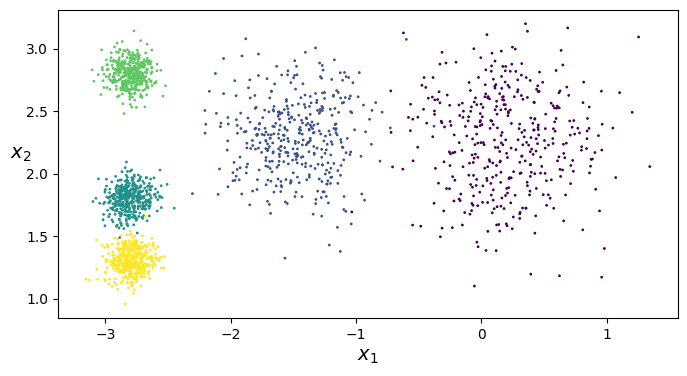

In [2]:
# Fonction d'affichage des clusters
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X, y)
plt.show()

5) Appliquez la méthode KMeans (avec k=5) sur les données synthétiques (X). Pour ce faire, instanciez un objet de la classe KMeans du sous-module cluster du module sklearn

6) En utilisant la méthode fit_predict, prédisez et affichez les indices des cluster de X. Stockez les indices de clusters prédits dans une variable

7) Pour évaluer le modèle, calculez son NMI (Normalized Mutual Index). Cet indice peut être obtenu via la fonction normalized_mutual_info_score du sous-module metrics du module sklearn

8) Intégrez, en rouge dans la figure ci-dessus, les centroïdes des cinq clusters via l'attribut "cluster_centers_" de l'objet créé dans la question 5


NMI Score: 0.8427


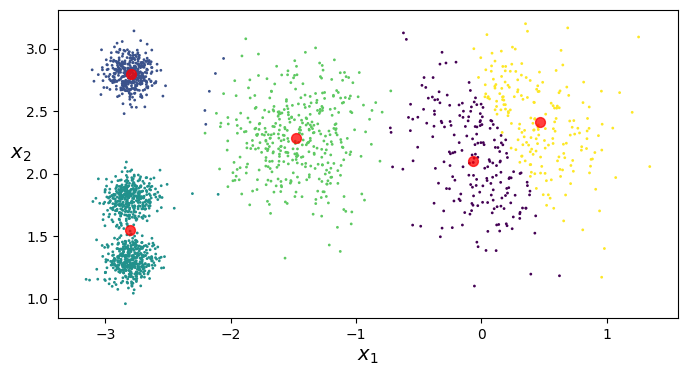

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score

# Application de KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)

# Évaluation du modèle
nmi_score = normalized_mutual_info_score(y, y_pred)
print(f"NMI Score: {nmi_score:.4f}")

# Affichage des centroïdes des clusters
plt.figure(figsize=(8, 4))
plot_clusters(X, y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='.')
plt.show()


9)a) Créez la nouvelle instance suivante :

X_new = np.array([[-3, 2.5]])


In [4]:
# Nouveau point
X_new = np.array([[-3, 2.5]])


b) Calculez la distance de X_new aux centroïdes des cinqs clusters via la méthode transform de la classe KMeans. Quel cluster a le centroïde le plus proche de X_new ?

c) Prédisez l'indice du cluster de X_new en utilisant la fonction predict. L'indice du cluster est conforme avec votre réponse à la question 9.b ?


In [5]:
# Calcul des distances aux centroïdes
distances = kmeans.transform(X_new)
print(f"Distances aux centroïdes: {distances}")

# Prévision du cluster du nouveau point
predicted_cluster = kmeans.predict(X_new)
print(f"Indice du cluster prédit: {predicted_cluster[0]}")

Distances aux centroïdes: [[2.95975563 0.36159148 0.96879317 1.54053323 3.47149865]]
Indice du cluster prédit: 1


#II- Clustering des images faciales via K-means

10) Créez une section intitulée II- Clustering des images faciales via K-means  

11) Importez la base de données fetch_olivetti_faces() depuis le sous-module datasets du module sklearn

12) Affichez la description de cette base de données via l'attribut DESCR

13) Affichez les indices de cluster de cette base de données via l'attribut target

14) Affichez les données de cette base de données via l'attribut data

15) Divisez cette base de données en bases d'apprentissage, de validation et de test. Pour ce faire, utilisez deux fois la fonction train_test_split du sous-module model_selection du module sklearn tout en optant la répartition suivante : 60% pour l'apprentissage 20% pour le test et 20% pour la validation

16) Appliquez KMeans sur les données d'apprentissage avec k=40

17) Prédisez les indices de cluster des données de validation tout en les affichant

18) Calculez le NMI (Normalized Mutual Index) du modèle. Cet indice peut être obtenu via l'appel de la fonction normalized_mutual_info_score du sous-module metrics du module sklearn

19) Proposez un code qui appelle la fonction ci-dessous et affiche les images faciales de validation et leurs cluster (voir le résultat ci-dessous) :


In [6]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

# Importation des données
faces = fetch_olivetti_faces()
print(faces.DESCR)

# Affichage des indices de cluster
print(faces.target)

# Affichage des données
print(faces.data)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side 

NMI Score for faces: 0.8381


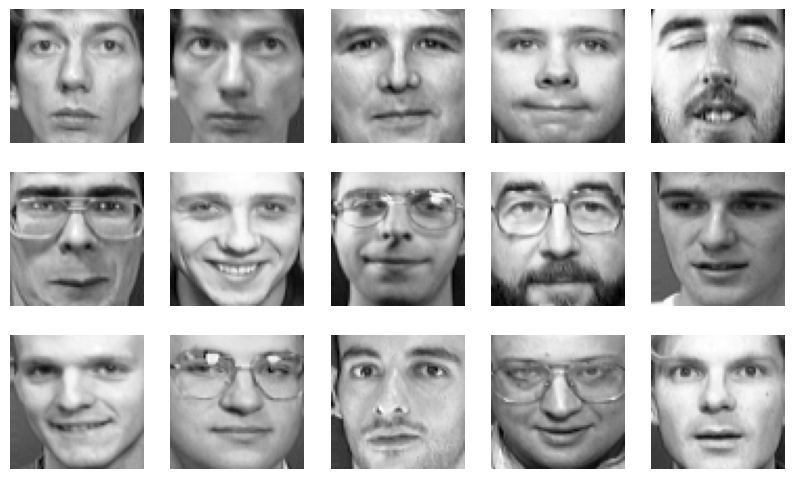

In [7]:
# Division des données
X_train, X_temp, y_train, y_temp = train_test_split(faces.data, faces.target, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Application de KMeans
kmeans_faces = KMeans(n_clusters=40, random_state=42)
y_train_pred = kmeans_faces.fit_predict(X_train)

# Prédiction des indices de cluster des données de validation
y_val_pred = kmeans_faces.predict(X_val)

# Évaluation du modèle
nmi_faces_score = normalized_mutual_info_score(y_val, y_val_pred)
print(f"NMI Score for faces: {nmi_faces_score:.4f}")

# Affichage des images faciales de validation et leurs clusters
def plot_faces(faces, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 2, n_rows * 2))
    for index in range(len(faces)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(faces[index].reshape(64, 64), cmap="gray")
        plt.axis("off")
    plt.show()

plot_faces(X_val[:15])
